<a href="https://colab.research.google.com/github/ojamoo/My-Git-Project/blob/master/Stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [5]:
!kaggle datasets download -d ojamoo/hamoyestageedataset

 41% 8.00M/19.4M [00:00<00:00, 81.6MB/s]
100% 19.4M/19.4M [00:00<00:00, 95.4MB/s]


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  hamoyestageedataset.zip
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: household_power_consumption.txt  


In [7]:
#loading the dataset
df = pd.read_csv('household_power_consumption.txt', sep=';',
                 na_values = '?',dtype = float ,low_memory=False,infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [8]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [9]:
#check for missing values
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
#filling the missing values with the mean
df = df.fillna(df.mean())

In [11]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [17]:
#daily resampling
df_daily = df.resample('D').sum()

In [18]:
rolling_mean = df_daily.rolling(365).mean()

In [19]:
rolling_std = df_daily.rolling(window = 365).std()

Text(0, 0.5, 'Sub metering 1')

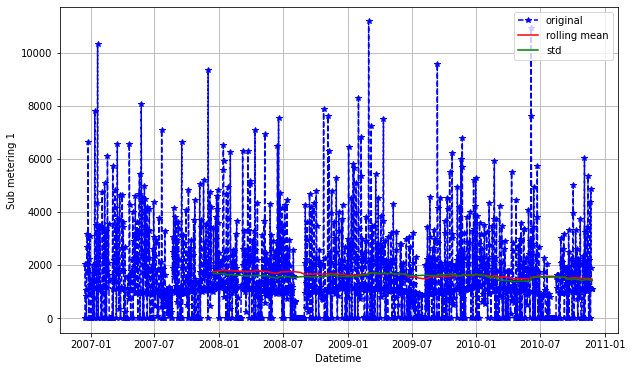

In [21]:
# SUB METERING 1 OF THE DAILY_DF
plt.figure(figsize=(10,6))
original = plt.plot(df_daily.index, df_daily.Sub_metering_1,'--', marker='*', color = 'blue',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Sub_metering_1, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Sub_metering_1, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Sub metering 1')

Text(0, 0.5, 'Global active power')

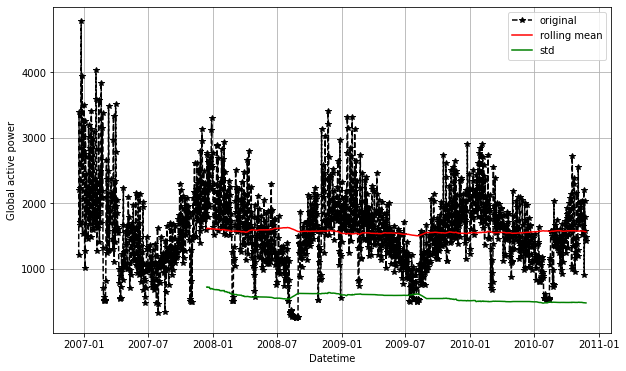

In [22]:
# GLOBAL ACTIVE POWER OF THE DAILY_DF
plt.figure(figsize=(10,6))
original = plt.plot(df_daily.index, df_daily.Global_active_power,'--', marker='*', color = 'black',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_active_power, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_active_power, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global active power')

Text(0, 0.5, 'Global Reactive Power')

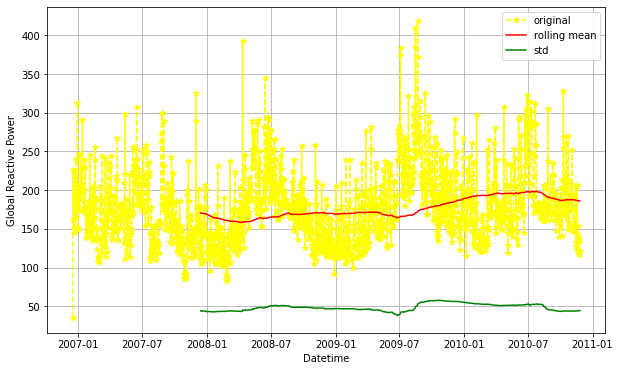

In [23]:
# GLOBAL_REACTIVE_POWER
plt.figure(figsize=(10,6))
original = plt.plot(df_daily.index, df_daily.Global_reactive_power,'--', marker='*', color = 'yellow',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_reactive_power, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_reactive_power, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global Reactive Power')

Text(0, 0.5, 'Sub metering 2')

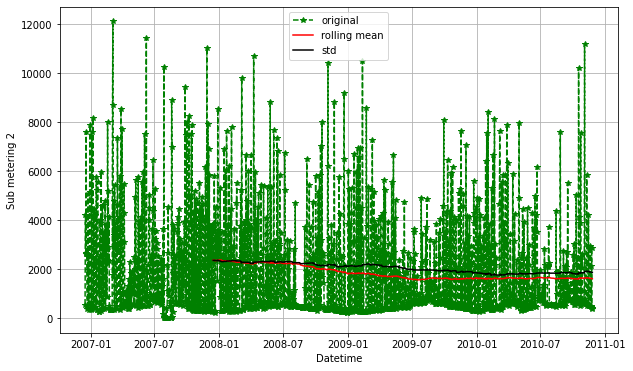

In [24]:
#SUB METERING 2
plt.figure(figsize=(10,6))
original = plt.plot(df_daily.index, df_daily.Sub_metering_2,'--', marker='*', color = 'green',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Sub_metering_2, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Sub_metering_2, color = 'black', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Sub metering 2')

Text(0, 0.5, 'Global_intensity')

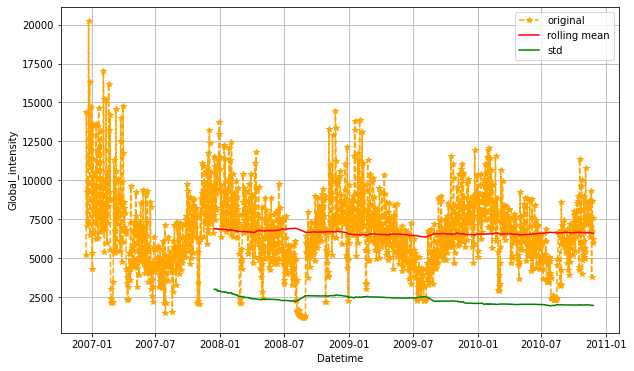

In [25]:
# GLOBAL INTENSITY
plt.figure(figsize=(10,6))
original = plt.plot(df_daily.index, df_daily.Global_intensity,'--', marker='*', color = 'orange',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_intensity, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_intensity, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global_intensity')

Text(0, 0.5, 'global active power')

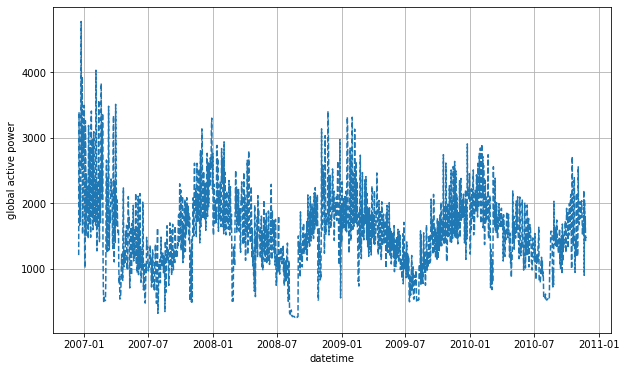

In [27]:
#plot of global active power on th daily time frame
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Global_active_power,'--')
plt.grid()
plt.xlabel('datetime')
plt.ylabel('global active power')

In [29]:
from scipy.stats import pearsonr
pearsonr(df['Global_active_power'],df['Global_reactive_power'])

(0.24701705264406518, 0.0)

In [30]:
#correlation coefficient between the Voltage andglobal_intensity
corr = pearsonr(df['Voltage'],df['Global_intensity'])
corr

(-0.41136307176847087, 0.0)

In [31]:
from fbprophet import Prophet

In [34]:
df_daily.reset_index(inplace=True)
prophet_daily = df_daily[['datetime','Global_active_power']]

In [35]:
prophet_daily = prophet_daily.rename(columns = {'datetime': 'ds','Global_active_power': 'y'})
print(prophet_daily.shape)
prophet_daily

(1442, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1437,2010-11-22,2041.536
1438,2010-11-23,1577.536
1439,2010-11-24,1796.248
1440,2010-11-25,1431.164


In [36]:
train_set = prophet_daily.iloc[:1077,:]
test_set = prophet_daily.iloc[1077:,:]
print(train_set.shape)
print(test_set.shape)

(1077, 2)
(365, 2)


In [37]:
#fitting the model to the dataset
p_model = Prophet()
p_model.fit(train_set)
pred = p_model.predict(test_set)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
# Define a model for the calculation of MAPE
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [43]:
mape = Metric(test_set['y'],pred['yhat'])
print(f'MAPE is: {round(mape,1)}')

MAPE is: 20.9


In [44]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set['y']),np.array(pred['yhat'])))
print('RMSE is: %s' %(round(rmse,1)))

RMSE is: 375.0


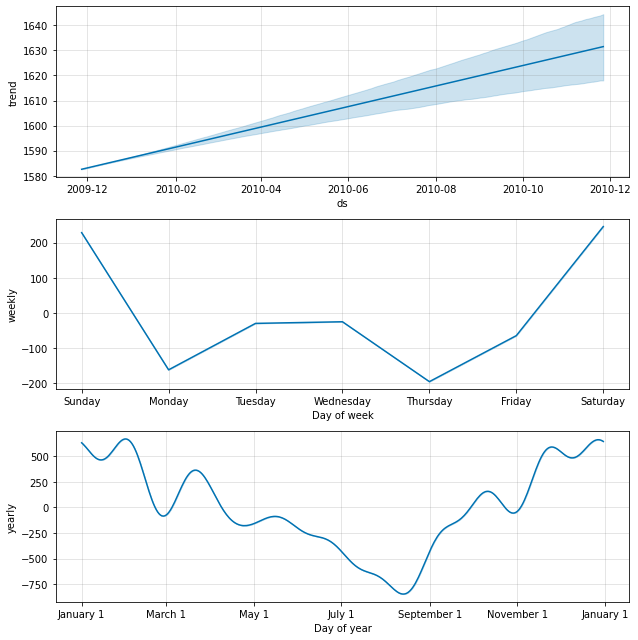

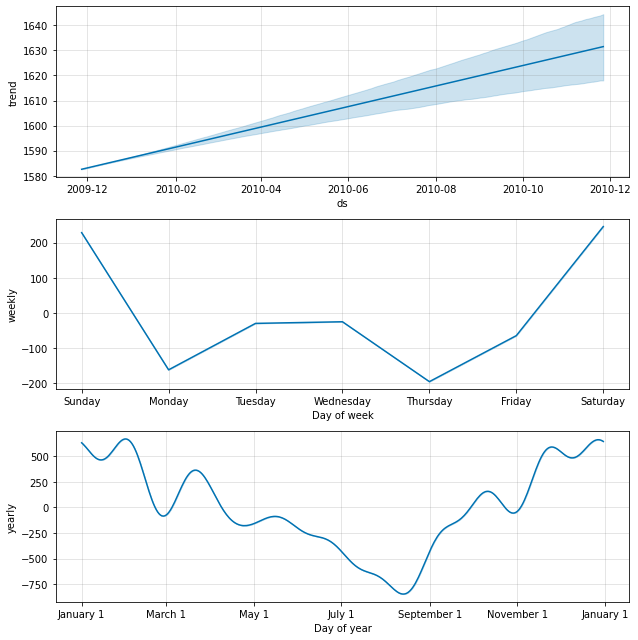

In [45]:
p_model.plot_components(pred)

In [47]:
#reseting the index column of the daily_df
df_daily.reset_index(inplace = True)
multi_prophet = df_daily
print(multi_prophet.shape)
multi_prophet.head()

(1442, 9)


,index,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [48]:
# Renaming the columns to prophet name format
multi_prophet = multi_prophet.rename(columns = {'datetime':'ds','Global_active_power':'y','Global_reactive_power':'add1',
                                                'Voltage':'add2','Global_intensity':'add3','Sub_metering_1':'add4',
                                                'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [49]:
train_set_multi = multi_prophet.iloc[:1077,:]
test_set_multi = multi_prophet.iloc[1077:,:]
print(train_set_multi.shape)
print(test_set_multi.shape)

(1077, 9)
(365, 9)


In [50]:
# Creating the prophet multivariate model
mult_model = Prophet()
mult_model.add_regressor('add1')
mult_model.add_regressor('add2')
mult_model.add_regressor('add3')
mult_model.add_regressor('add4')
mult_model.add_regressor('add5')
mult_model.add_regressor('add6')

In [51]:
# Fitting the model to train set
mult_model.fit(train_set_multi)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
# Making prediction with test_set
m_pred = mult_model.predict(test_set_multi)

In [53]:
# calculating the MAPE using the previously defined function
mape = Metric(test_set_multi['y'],m_pred['yhat'])
print(mape)

2.626160199868196


In [54]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set_multi['y']),np.array(m_pred['yhat'])))
print(rmse)

39.134901085290956


Figure(648x864)


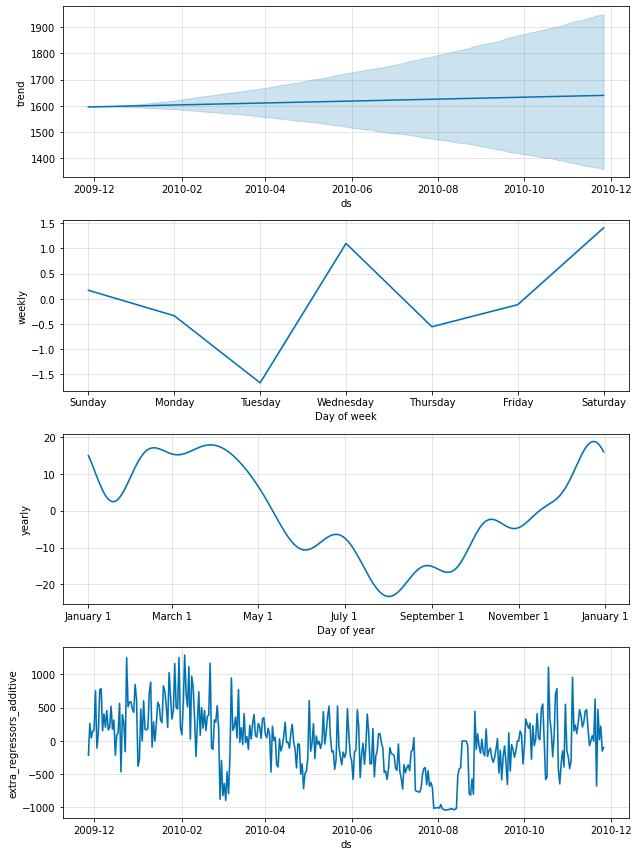

In [55]:
print(mult_model.plot_components(m_pred))